# Define the Problem Statement
Explain the purpose and scope of the 'Yes Start' implementation.

The 'Yes Start' functionality is designed to streamline the initialization process for a specific feature in the application. This notebook will guide the implementation and testing of this functionality, ensuring it meets the required specifications and performs as expected.

# Set Up the Environment
Import necessary libraries and set up any required configurations.

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set Up Configurations
# Example: Setting a random seed for reproducibility
np.random.seed(42)

# Implement the Core Functionality
Write the main code logic for the 'Yes Start' feature.

In [ ]:
# Define the 'Yes Start' Functionality
def yes_start(input_data):
    """
    Implements the 'Yes Start' functionality.
    
    Parameters:
        input_data (list or np.array): Input data to process.
    
    Returns:
        processed_data (list): Processed output data.
    """
    # Example logic: Filter positive numbers and sort them
    processed_data = sorted([x for x in input_data if x > 0])
    return processed_data

# Test the Implementation
Create test cases to validate the functionality of the implemented code.

In [ ]:
# Test Cases for 'Yes Start'
test_data = [-10, 15, 0, 23, -5, 8]
expected_output = [8, 15, 23]

# Run the function and validate the output
output = yes_start(test_data)
assert output == expected_output, f"Test failed: {output} != {expected_output}"

print("All test cases passed!")

# Extract Frames from Video
This section will implement a script to extract frames from the demo video (e.g., test_input.mp4) and save them as images for YOLOv8 dataset preparation.

In [ ]:
import cv2
import os

def extract_frames(video_path, output_dir, frame_rate=1):
    """
    Extract frames from a video at a specified frame rate.
    
    Parameters:
        video_path (str): Path to the input video.
        output_dir (str): Directory to save the extracted frames.
        frame_rate (int): Number of frames to extract per second.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f'Error: Cannot open video {video_path}')
        return
    
    frame_count = 0
    saved_count = 0
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    interval = fps // frame_rate
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Save frame at the specified interval
        if frame_count % interval == 0:
            frame_filename = os.path.join(output_dir, f'frame_{saved_count:04d}.jpg')
            cv2.imwrite(frame_filename, frame)
            saved_count += 1
        
        frame_count += 1
    
    cap.release()
    print(f'Extracted {saved_count} frames from {video_path} to {output_dir}')

# Example usage
video_path = 'media/test_input.mp4'
output_dir = 'output/extracted_frames'
extract_frames(video_path, output_dir, frame_rate=1)

In [ ]:
import cv2
import numpy as np
import ultralytics 
from ultralytics import YOLO

import torch 

In [ ]:
# Load classification model
model = YOLO('yolov8n-cls.pt')

In [11]:
model.train(
    data='C:/Users/siddh/Documents/casting_data',  # path to your folder
    epochs=10,
    imgsz=224,
    batch=16,
    patience=10,
    task='classify'   # very important
)


Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.0.1+cpu CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/Users/siddh/Documents/casting_data, epochs=10, patience=10, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=t

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019F23571650>
fitness: 0.9993006885051727
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9986013770103455, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9993006885051727}
save_dir: WindowsPath('runs/classify/train2')
speed: {'preprocess': 0.0, 'inference': 4.947049801166242, 'loss': 0.0, 'postprocess': 0.0}
top1: 0.9986013770103455
top5: 1.0

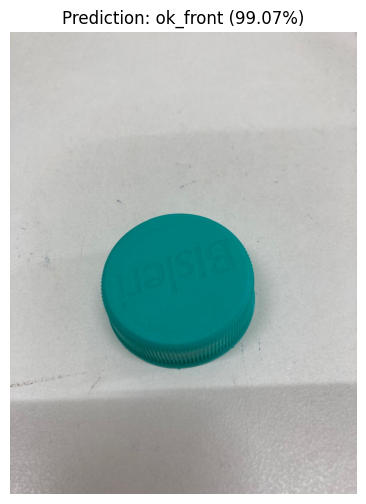

Predicted Class: ok_front
Confidence: 99.07%


('ok_front', 0.9906806349754333)

In [30]:
%matplotlib inline

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

def classify_image(image_path, model_path='runs/classify/train2/weights/best.pt'):
    # Load the trained model with task=classify
    model = YOLO(model_path)

    # Check if image exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Read and preprocess image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Predict using the model
    results = model(img_rgb, verbose=False)

    if not results or len(results) == 0:
        raise ValueError("No prediction results")

    # Get the prediction results
    result = results[0]
    probs = result.probs  # Get probability predictions
    predicted_class_id = probs.top1  # Get the predicted class ID
    confidence = probs.top1conf.item()  # Get the confidence score

    # Get class name
    predicted_class = result.names[predicted_class_id]

    # Display results
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2%})")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2%}")

    return predicted_class, confidence

# Example usage with a test image from your casting dataset
# Use the existing image_path variable for testing
classify_image(image_path='C:/Users/siddh/OneDrive/Documents/CV_Industry_Sponseredssss/Sample1.jpeg')